In [48]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("my_database.db")
cursor = conn.cursor()

df = pd.read_csv("C:\\Users\\Tense\\Documents\\Flatiron\\dsc-phase-2-project-v3\\tn.movie_budgets.csv")
df.to_sql('movie_budgets',conn, if_exists='replace',index=False)
'''
CREATE TABLE movie_budgets (
    id INT PRIMARY KEY,
    movie VARCHAR(100),
    production_budget INT,
    domestic_gross INT,
    worldwide_gross INT,
    release_date DATE
);
'''
conn.commit()

In [49]:
query = "SELECT * FROM movie_budgets LIMIT 10"
result = pd.read_sql_query(query, conn)
print(result)

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
5   6  Dec 18, 2015         Star Wars Ep. VII: The Force Awakens   
6   7  Apr 27, 2018                       Avengers: Infinity War   
7   8  May 24, 2007   Pirates of the Caribbean: At Worldâs End   
8   9  Nov 17, 2017                               Justice League   
9  10   Nov 6, 2015                                      Spectre   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,

In [50]:
query = """
SELECT movie, production_budget, domestic_gross, worldwide_gross, release_date
FROM movie_budgets
ORDER BY worldwide_gross DESC
LIMIT 10;
"""
conn.commit()
result = pd.read_sql_query(query, conn)
result

movie production_budget domestic_gross worldwide_gross  \
0  Fifty Dead Men Walking       $10,000,000             $0        $997,921   
1                    Duma       $12,000,000       $870,067        $994,790   
2               Insidious        $1,500,000    $54,009,150     $99,870,886   
3                 Hellboy       $60,000,000    $59,623,958     $99,823,958   
4                 Mad Max          $200,000     $8,750,000     $99,750,000   
5                   Alpha       $51,000,000    $35,851,379     $99,624,873   
6          Street Fighter       $35,000,000    $33,423,000     $99,423,000   
7             Nacho Libre       $32,000,000    $80,197,993     $99,296,462   
8             Desert Blue        $5,000,000        $99,147         $99,147   
9                  Hitman       $24,000,000    $39,687,694     $99,135,571   

   release_date  
0  Aug 21, 2009  
1  Sep 30, 2005  
2   Apr 1, 2011  
3   Apr 2, 2004  
4  Mar 21, 1980  
5  Aug 17, 2018  
6  Dec 23, 1994  
7  Jun 16, 2006  
8   Jun 4, 1999  
9  Nov 21, 2007

In [51]:
data = {
    "movie": ["Hellboy", "Alpha", "Hellboy", "Street Fighter", "Nacho Libre", "Insidious", "Mad Max"],
    "production_budget": [60000000, 51000000, 50000000, 35000000, 32000000, 1500000, 200000],
    "total_gross": [159447916, 135476252, 62629240, 132846000, 179494455, 153880036, 10850000],
    "release_date": ["2004-04-02", "2018-08-17", "2019-04-12", "1994-12-23", "2006-06-16", "2010-09-14", "1979-04-12"]
}


df = pd.DataFrame(data)
df["release_date"] = pd.to_datetime(df["release_date"])
df["ROI"] = df["total_gross"] / df["production_budget"]

print(df)


            movie  production_budget  total_gross release_date         ROI
0         Hellboy           60000000    159447916   2004-04-02    2.657465
1           Alpha           51000000    135476252   2018-08-17    2.656397
2         Hellboy           50000000     62629240   2019-04-12    1.252585
3  Street Fighter           35000000    132846000   1994-12-23    3.795600
4     Nacho Libre           32000000    179494455   2006-06-16    5.609202
5       Insidious            1500000    153880036   2010-09-14  102.586691
6         Mad Max             200000     10850000   1979-04-12   54.250000


In [52]:
df_sorted_by_date = df.sort_values(by='release_date', ascending=False).head(10)
print(df_sorted_by_date)

            movie  production_budget  total_gross release_date         ROI
2         Hellboy           50000000     62629240   2019-04-12    1.252585
1           Alpha           51000000    135476252   2018-08-17    2.656397
5       Insidious            1500000    153880036   2010-09-14  102.586691
4     Nacho Libre           32000000    179494455   2006-06-16    5.609202
0         Hellboy           60000000    159447916   2004-04-02    2.657465
3  Street Fighter           35000000    132846000   1994-12-23    3.795600
6         Mad Max             200000     10850000   1979-04-12   54.250000


<AxesSubplot:xlabel='movie', ylabel='total_gross'>

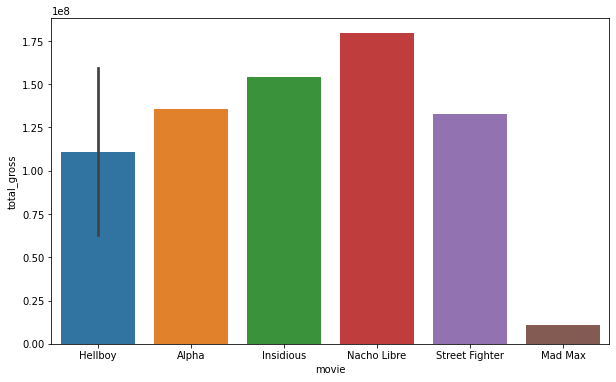

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='movie', y='total_gross', data=df_sorted_by_date)



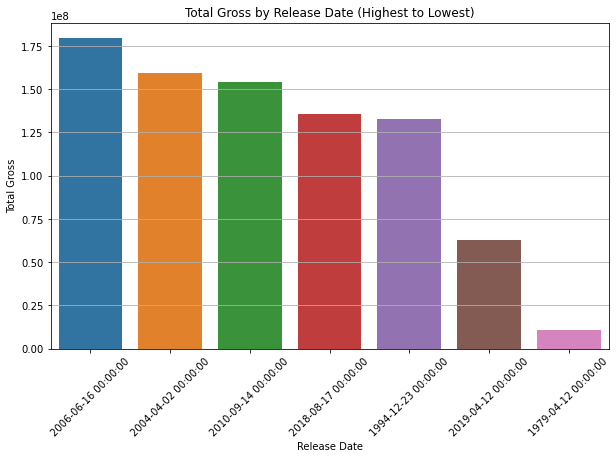

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


df_sorted_by_gross = df.sort_values(by="total_gross", ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(
    x="release_date", 
    y="total_gross", 
    data=df_sorted_by_gross, 
    order=df_sorted_by_gross["release_date"]
)


plt.xticks(rotation=45) 
plt.title("Total Gross by Release Date (Highest to Lowest)")
plt.xlabel("Release Date")
plt.ylabel("Total Gross")
plt.grid(axis="y")

plt.show()


Plain text 

This is an extention of my research into which movie had the highest gross. When the thought of looking into the profit per date corrilation I had come up with the last graft. However this only wound up in the back burner as things were expanded on.